In [90]:
import camb as camb
import matplotlib.pyplot as plt
import numpy as np

In [91]:
pars=camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
results=camb.get_background(pars)
z = np.linspace(0.01,4,100)
mu = 5.*np.log10(results.luminosity_distance(z))

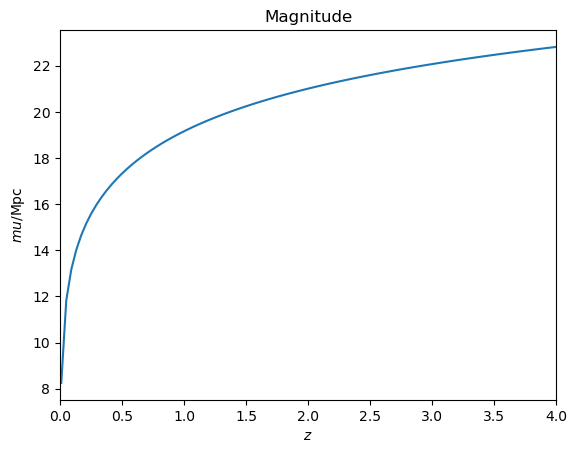

In [92]:
plt.plot(z, mu)
plt.xlabel('$z$')
plt.ylabel(r'$mu /\rm{Mpc}$')
plt.title('Magnitude')
plt.xlim([0,4]);

In [93]:
data = np.loadtxt('fit_exercise_data.txt')

obs_z = data[:,0]
obs_mu = data[:,1]

covariance = np.loadtxt('fit_exercise_covariance.txt')

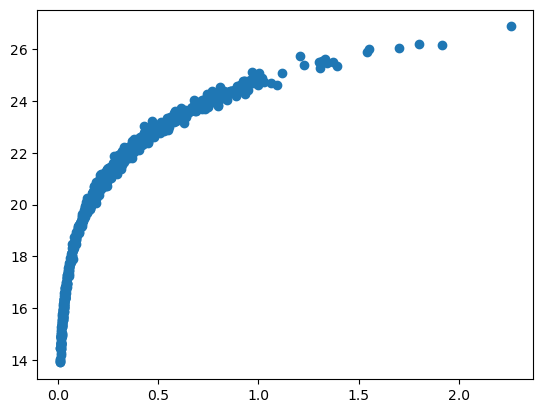

In [94]:
plt.plot(data[:,0], data[:,1], 'o')

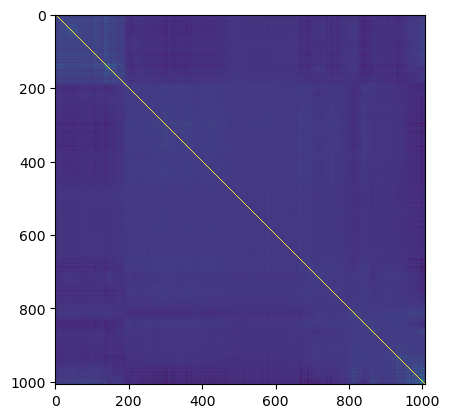

In [95]:
correlation=np.corrcoef(covariance)
plt.imshow(correlation, interpolation='nearest')

Likehood

In [96]:
inv_cov = np.linalg.inv(covariance)

In [99]:
def likehood(omegam):
    #comopute the model mu
    pars=camb.CAMBparams()
    H0 = 70.
    h=H0/100.
    pars.set_cosmology(H0=H0, ombh2=omegam * h**2 * 0.15, omch2=omegam * h**2 * 0.85),
    results=camb.get_background(pars)
    
    mu = 5.*np.log10(results.luminosity_distance(obs_z))
    #costruiamo la likehood
    residuals=mu-obs_mu
    like = -0.5 * np.dot(residuals, np.dot(inv_cov, residuals))
    ones = np.ones_like(residuals)
    temp1=np.dot(ones, np.dot(inv_cov, residuals))
    temp2=np.dot(ones, np.dot(inv_cov, ones))
    like+=0.5*temp1**2/temp2

    return like






Text(0, 0.5, 'Likehood')

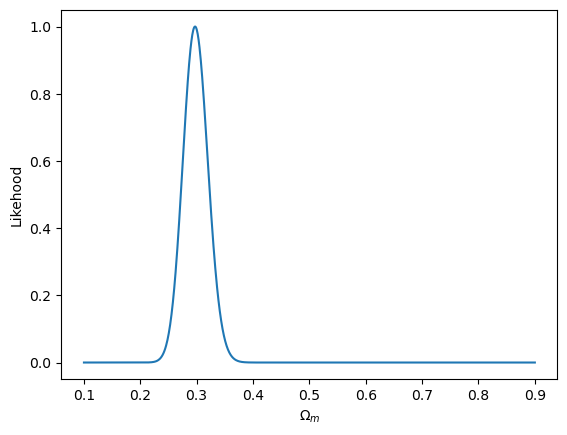

In [106]:
omegam_grid = np.linspace(0.1, 0.9, 1000)
likelihoods = np.array([likehood(omegam) for omegam in omegam_grid])
likelihoods = likelihoods - np.amax(likelihoods)
plt.plot(omegam_grid, np.exp(likelihoods))
plt.xlabel(r'$\Omega_m$')
plt.ylabel('Likehood')

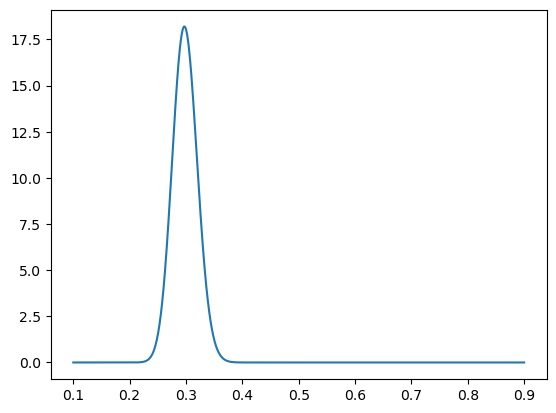

In [108]:
norm = np.trapezoid(np.exp(likelihoods), omegam_grid)
posterior = np.exp(likelihoods)/norm
plt.plot(omegam_grid, posterior)